In this repository we perform PCA with a Linear Autoencoder 

if an autoencoder uses only linear activations and the cost function is the mean squared error.

In [2]:
# imports 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
from sklearn.datasets import make_blobs

In [5]:
data = make_blobs(n_samples=100, n_features=3,centers = 2,random_state=101)

In [6]:
type(data)

tuple

In [7]:
data[0]     # actual data

array([[  0.99429187,   0.87511711,  -9.99909683],
       [  0.65761885,   0.91624771, -10.18458517],
       [ -6.48804352,   3.29034852,   6.73159871],
       [  0.5815206 ,   2.06249948,  -9.07157495],
       [ -7.42442678,   5.30835517,   6.86341624],
       [  2.26790487,   0.40816482, -10.17230518],
       [  1.62073713,  -0.05416228,  -9.92461083],
       [  2.41199108,   1.03683306,  -9.20017913],
       [ -7.62441747,   5.87096075,   5.41069708],
       [ -7.34160752,   3.671108  ,   7.36634568],
       [ -7.56358517,   3.5736335 ,   5.34284552],
       [  2.22972735,   1.6514787 ,  -7.43386319],
       [ -0.75249891,   2.31574949,  -9.26873428],
       [  0.54946324,   0.5581557 ,  -7.88852506],
       [ -0.4308995 ,   0.48011452,  -8.47545896],
       [ -1.19436032,   2.54705473,  -8.90232874],
       [ -0.06318407,   2.4416449 , -11.40312057],
       [ -6.70999871,   3.8246846 ,   7.34365184],
       [  1.32054601,   2.60559237, -10.47729501],
       [  0.15391601,   2.19349

In [8]:
data[1]                 # labels

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
# scale data before applying dimensionality reduction

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [29]:
# 3D data

data_x = scaled_data[:,0]   # all rows and zeroth column
data_y = scaled_data[:,1]   # all rows and 1st column
data_z = scaled_data[:,2]   # all rows and 2nd column

In [30]:
from mpl_toolkits.mplot3d import Axes3D    # 3D plot

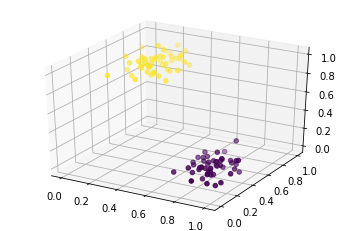

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1])

In [32]:
import tensorflow as tf

In [34]:
from tensorflow.contrib.layers import fully_connected

In [35]:
num_inputs = 3
num_hidden = 2
num_outputs = num_inputs

In [36]:
learning_rate = 0.01

In [37]:
X = tf.placeholder(tf.float32,shape=[None,num_inputs])

In [38]:
hidden = fully_connected(X,num_hidden,activation_fn=None)
outputs = fully_connected(hidden,num_outputs,activation_fn=None)

In [39]:
loss = tf.reduce_mean(tf.square(outputs - X))    # MSE

In [40]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [41]:
train =optimizer.minimize(loss)

In [42]:
init = tf.global_variables_initializer()

In [43]:
num_steps = 1000

In [45]:
with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train,feed_dict={X:scaled_data})
        
    output_2d = hidden.eval(feed_dict={X:scaled_data})    # passing scaled data to hidden layer
    


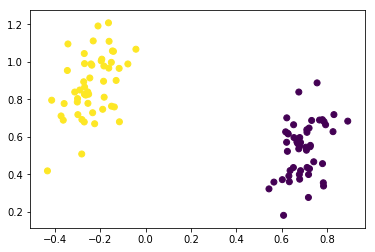

In [51]:
plt.scatter(output_2d[:,0],output_2d[:,1],c=data[1])       # 2d representation of orignal data